In [1]:
from scipy import misc
import glob
import numpy as np
from sklearn.svm import SVC
import copy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

np.set_printoptions(threshold=np.nan)

In [2]:

def plot_roc(y_test, y_score, name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='ROC '+str(name)+' (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
def tsne(X, Y):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(X)
    k = np.array(transformed_data)
    plt.scatter(k[:, 0], k[:, 1], c=Y, zorder=10, s=2)
    plt.show()

In [4]:
def confusion_matri(y_truth, y_predicted):

    y_truth = np.array(y_truth)

    shape = max(np.unique(y_truth).shape[0], np.unique(y_predicted).shape[0]) +1
    
    print(shape)
    
    m = [[0] * shape for i in range(shape)]
    
    for exp, pred in zip(y_truth, y_predicted):
        m[int(pred)][int(exp)] += 1
    
    n = shape-1
    for j in range(0, n):
        t = 0
        for i in range(n):
            t = t + m[i][j]

        m[n][j] = t

    for i in range(n):
        m[i][n] = sum(m[i])
    return m

In [5]:
train_x=[]
train_y=[]

p = ['character_1_ka', 'character_2_kha', 'character_3_ga', 'character_4_gha', 'character_5_kna']
for k in range(0,len(p)):
    for image_path in glob.glob("Train_val/"+str(p[k])+"/*.png"):
        image = misc.imread(image_path)

        image[image>0] = 1
        image[image<=0] = 0

        train_x.append(image.reshape(-1))
        train_y.append(k)

        
test_x=[]
test_y=[]
p = ['character_1_ka', 'character_2_kha', 'character_3_ga', 'character_4_gha', 'character_5_kna']
for k in range(0,len(p)):
    for image_path in glob.glob("Test/"+str(p[k])+"/*.png"):
        image = misc.imread(image_path)

        image[image>0] = 1
        image[image<=0] = 0

        test_x.append(image.reshape(-1))
        test_y.append(k)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


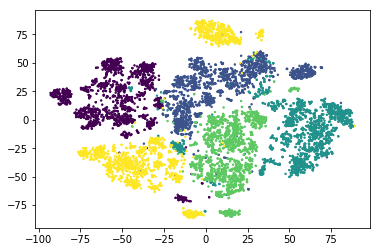

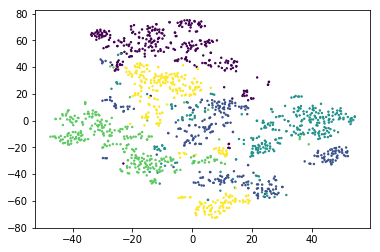

In [11]:
tsne(train_x, train_y)
tsne(test_x, test_y)

In [7]:
best_svm = SVC(kernel='rbf')
best_score = 0

kf = KFold(n_splits=5, shuffle=True)
for train, validation in kf.split(train_x):
    x_cv_train = []
    y_cv_train = []

    x_cv_validation = []
    y_cv_validation = []

    for t in train:
        x_cv_train.append(train_x[t])
        y_cv_train.append(train_y[t])
    
    for t in validation:
        x_cv_validation.append(train_x[t])
        y_cv_validation.append(train_y[t])
    
    print("\nSplit:",len(x_cv_train), len(x_cv_validation))
    
    svm = SVC(kernel='rbf')
    svm.fit(x_cv_train, y_cv_train)
    
    train_score = svm.score(x_cv_train, y_cv_train)
    validation_score = svm.score(x_cv_validation, y_cv_validation)
    
    print("Training Score", train_score)
    print("Validation Score", validation_score)
    
    if validation_score> best_score:
        best_svm = svm
        best_score = validation_score


Split: 6800 1700
Training Score 0.9445588235294118
Validation Score 0.9358823529411765

Split: 6800 1700
Training Score 0.9480882352941177
Validation Score 0.9235294117647059

Split: 6800 1700
Training Score 0.9455882352941176
Validation Score 0.9288235294117647

Split: 6800 1700
Training Score 0.9445588235294118
Validation Score 0.9294117647058824

Split: 6800 1700
Training Score 0.9463235294117647
Validation Score 0.928235294117647


In [8]:
print("Best Validation Score:", best_score)
print("Best SVM:", best_svm)
test_y_predicted = best_svm.predict(test_x)
confusion_matri(test_y, test_y_predicted)

# test_y = np.array(test_y)
# test_y[test_y>1]=1
# plot_roc(test_y, best_svm.decision_function(test_x), 'Test')

Best Validation Score: 0.9358823529411765
Best SVM: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
6


[[290, 6, 3, 4, 1, 304],
 [9, 280, 19, 3, 4, 315],
 [0, 8, 268, 7, 4, 287],
 [0, 3, 8, 285, 5, 301],
 [1, 3, 2, 1, 286, 293],
 [300, 300, 300, 300, 300, 0]]

In [9]:
# svm = SVC(kernel='rbf', probability=True)
# svm.fit(train_x, train_y_)
# t = svm.predict_proba(test_x)

In [10]:
probas_ = t
fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

IndexError: invalid index to scalar variable.